In [28]:
# Importing libraries - TD

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode, kurtosis, skew
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tableone import TableOne, load_dataset

In [2]:
# Bring in Data set - TD
adult = pd.read_csv('Clean_Data.csv')

adult.columns


Index(['SRVY_YR', 'URBRRL', 'REGION', 'AGEP_A', 'SEX_A', 'HISP_A',
       'RACEALLP_A', 'MLTFAMFLG_A', 'PHSTAT_A', 'HYPEV_A', 'CHLEV_A',
       'ANGEV_A', 'MIEV_A', 'STREV_A', 'ASEV_A', 'NUMCAN_A', 'HEIGHTTC_A',
       'WEIGHTLBTC_A', 'BMICAT_A', 'DISAB3_A', 'NOTCOV_A', 'PAYWORRY_A',
       'URGNT12MTC_A', 'EMERG12MTC_A', 'ANXLEVEL_A', 'DEPLEVEL_A',
       'SMKCIGST_A', 'SMKECIGST_A', 'LEGMSTAT_A', 'PARSTAT_A', 'CITZNSTP_A',
       'SCHCURENR_A', 'POVRATTC_A', 'FSNAP12M_A', 'FDSCAT4_A', 'HOUTENURE_A',
       'CHDEV_A', 'DIA_STATUS'],
      dtype='object')

In [3]:
# Continuous chart
# Corrleation Matrix
# DIA_status, region -Tom
# depression, anxiety, age, dia - Tom
# Race, poverty ratio, Dia - Tom
# food stamp, food security, race, dia - Tom

# Discrete Chart
# Chol, bmi, dia - Mark
# heatlh insurance, physical health, dia - mark
# High blood, low income, dia - mark
# Disability status, general heatlh, dia - mark

In [4]:
# Extract the continuous variables from the DataFrame - TD
continuous_vars = ['AGEP_A', 'NUMCAN_A', 'HEIGHTTC_A', 'WEIGHTLBTC_A', 'POVRATTC_A']

# Calculate summary statistics
summary_stats = pd.DataFrame({
    'Mean': adult[continuous_vars].mean(),
    'Median': adult[continuous_vars].median(),
    'Max': adult[continuous_vars].max(),
    'Min': adult[continuous_vars].min(),
    'Spread': adult[continuous_vars].max() - adult[continuous_vars].min(),
    'Kurtosis': [kurtosis(adult[var]) for var in continuous_vars],
    'Skewness': [skew(adult[var]) for var in continuous_vars]
}, index=continuous_vars)

# Print the summary statistics table
print(summary_stats)

                    Mean  Median    Max    Min  Spread   Kurtosis  Skewness
AGEP_A         52.976420   54.00   99.0   18.0    81.0  -1.056787 -0.047634
NUMCAN_A        0.154559    0.00    4.0    0.0     4.0  12.601091  3.252797
HEIGHTTC_A     68.639196   67.00   96.0   59.0    37.0   5.709118  2.350049
WEIGHTLBTC_A  228.263423  176.00  996.0  100.0   896.0  10.103533  3.399739
POVRATTC_A      4.346493    3.67   11.0    0.0    11.0  -0.323040  0.786484


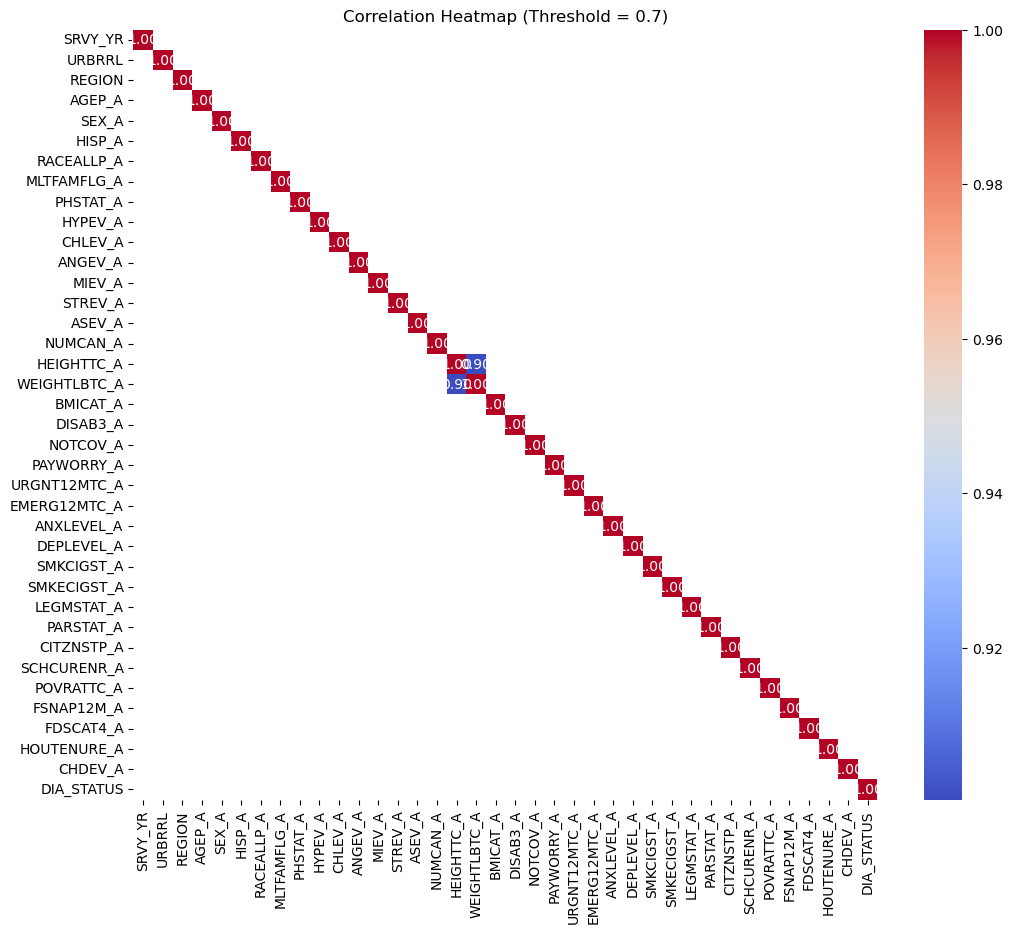

In [5]:
corr_matrix = adult.corr()

threshold = 0.7

# Filter correlations below threshold
high_corr = corr_matrix[abs(corr_matrix) > threshold]

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Threshold = 0.7)')
plt.show()

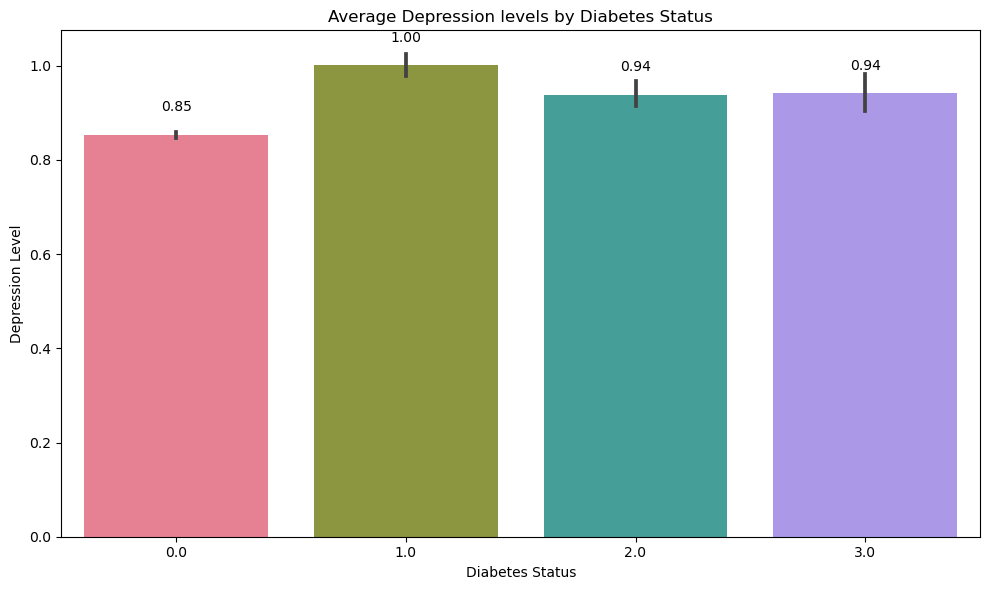

In [6]:
# Average Depression levels by Diabetes Status - TD

plt.figure(figsize=(10, 6))

# Calculate average depression levels by diabetes status
average_depression_by_status = adult.groupby('DIA_STATUS')['DEPLEVEL_A'].mean()

# Create the bar plot
ax = sns.barplot(data=adult, x='DIA_STATUS', y='DEPLEVEL_A', palette='husl')

# Add title and labels
plt.title('Average Depression levels by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Depression Level')

# Add average depression levels on top of bars
for i, val in enumerate(average_depression_by_status):
    ax.text(i, val + 0.05, f'{val:.2f}', ha='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

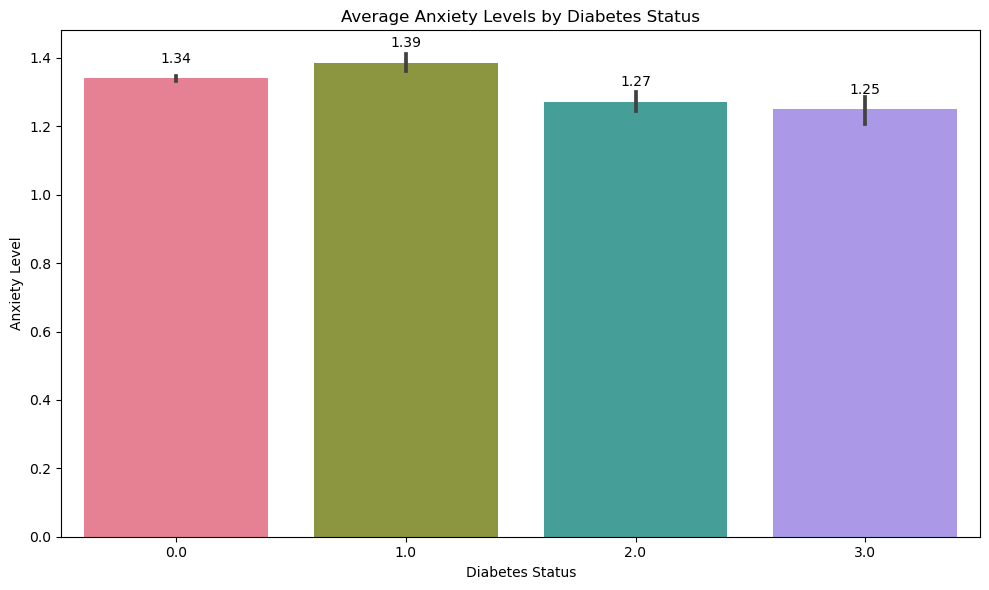

In [7]:
# Average Anxiety Levels by Diabetes Status - TD

plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(data=adult, x='DIA_STATUS', y='ANXLEVEL_A', palette='husl')

# Add title and labels
plt.title('Average Anxiety Levels by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Anxiety Level')

# Add numbers on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 14),
                textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

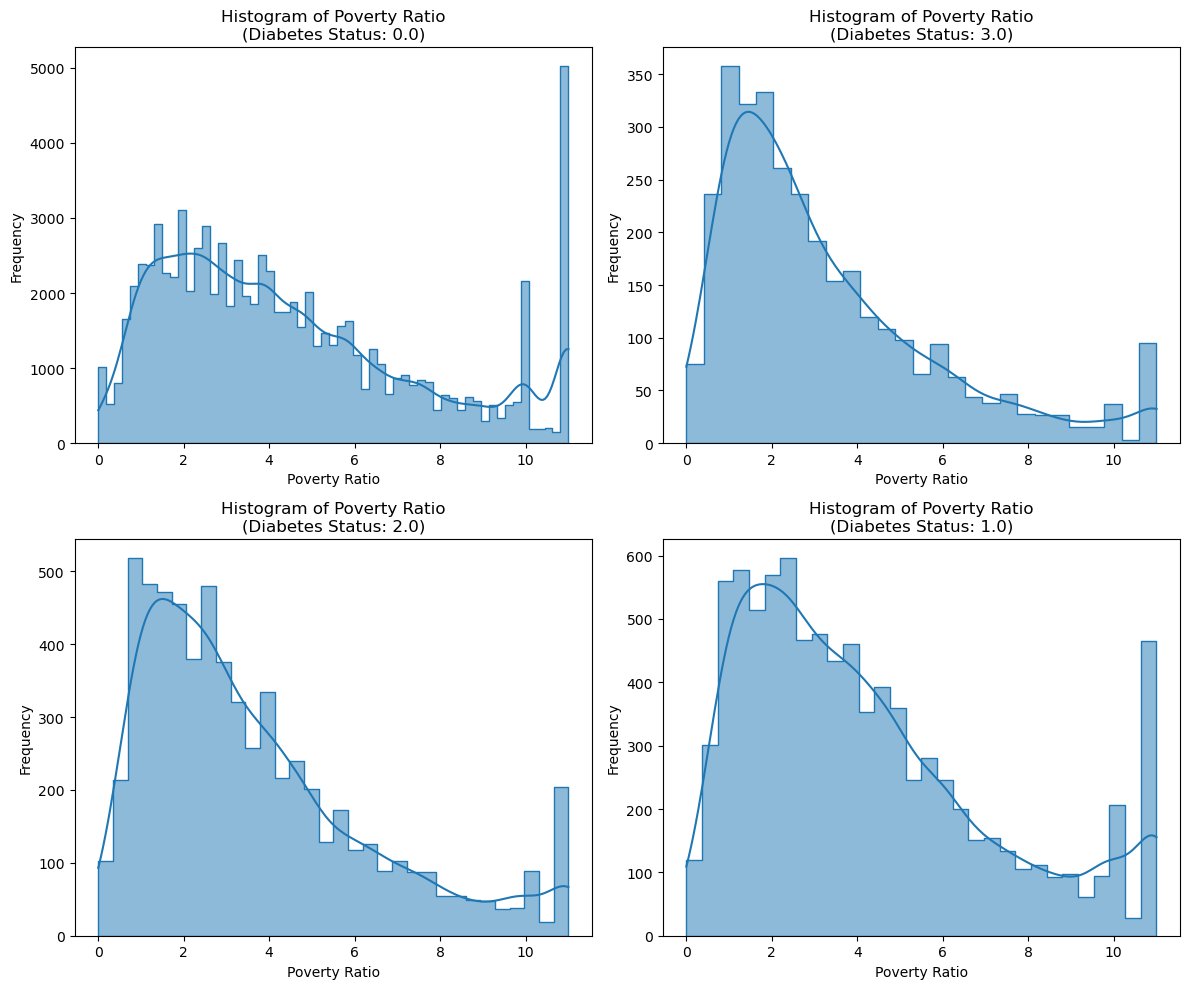

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create a histogram for each diabetes status
for i, status in enumerate(adult['DIA_STATUS'].unique()):
    # Filter data for the current diabetes status
    data = adult[adult['DIA_STATUS'] == status]
    
    # Create the histogram
    sns.histplot(data=data, x='POVRATTC_A', ax=axes[i], element='step', kde=True, palette='husl')
    
    # Add title and labels
    axes[i].set_title(f'Histogram of Poverty Ratio\n(Diabetes Status: {status})')
    axes[i].set_xlabel('Poverty Ratio')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

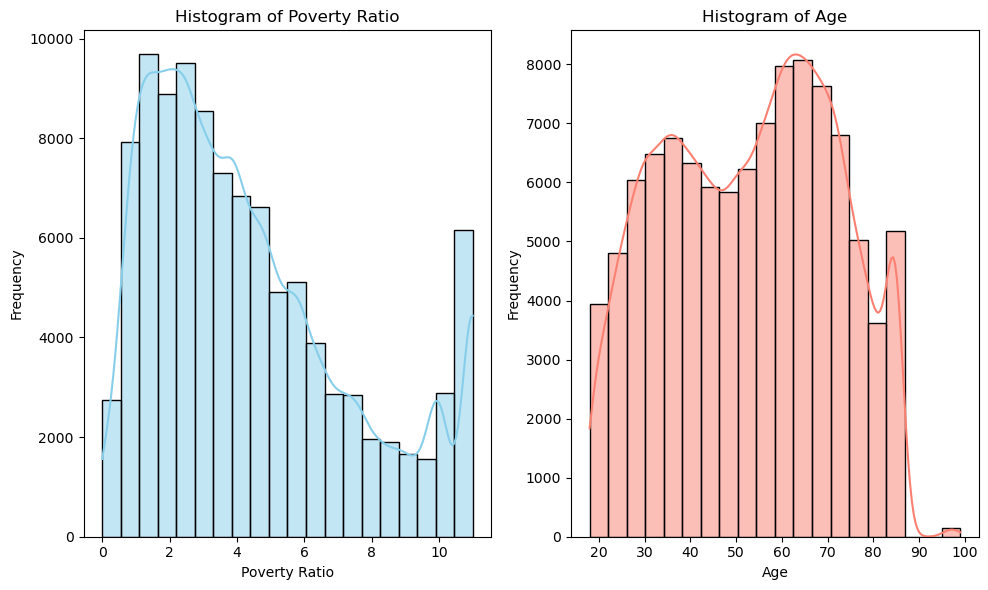

In [9]:
plt.figure(figsize=(10, 6))

# Create the histogram for poverty ratio
plt.subplot(1, 2, 1)
sns.histplot(data=adult, x='POVRATTC_A', bins=20, kde=True, color='skyblue')
plt.title('Histogram of Poverty Ratio')
plt.xlabel('Poverty Ratio')
plt.ylabel('Frequency')

# Create the histogram for age
plt.subplot(1, 2, 2)
sns.histplot(data=adult, x='AGEP_A', bins=20, kde=True, color='salmon')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

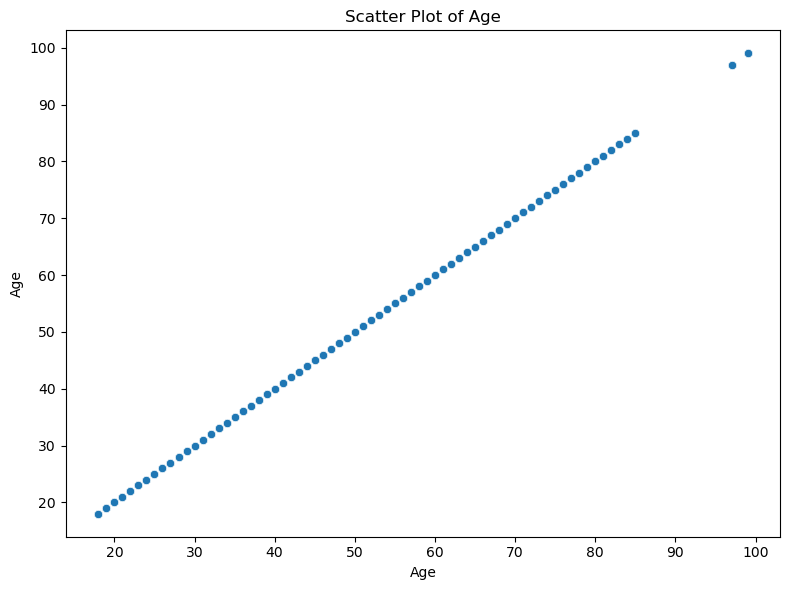

In [10]:
# Set up the figure - TD
plt.figure(figsize=(8, 6))

# Create the scatter plot for age
sns.scatterplot(data=adult, x='AGEP_A', y='AGEP_A', palette='husl')

# Add title and labels
plt.title('Scatter Plot of Age')
plt.xlabel('Age')
plt.ylabel('Age')

# Show the plot
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='REGION', ylabel='POVRATTC_A'>

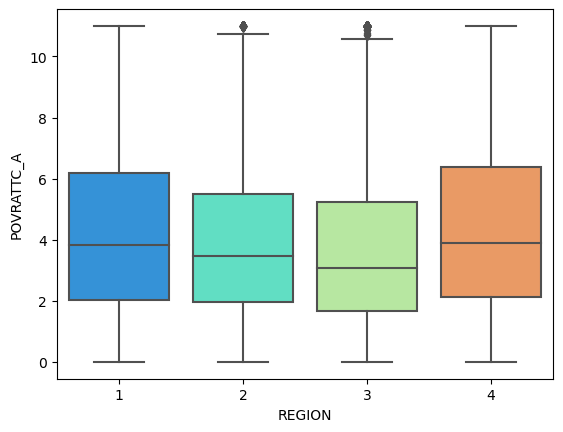

In [25]:
#visualizing poverty rate by region
#MH
sns.boxplot(x="REGION", y="POVRATTC_A", data=data,palette='rainbow')

In [29]:
#Creating a TableOne on data for statistical exploration
#MH
for col in data.columns:
    print(col)
    
    
columns = ['SRVY_YR','URBRRL','REGION','AGEP_A','SEX_A','HISP_A','RACEALLP_A','MLTFAMFLG_A','PHSTAT_A','HYPEV_A','CHLEV_A','ANGEV_A','MIEV_A','STREV_A','ASEV_A','NUMCAN_A','HEIGHTTC_A','WEIGHTLBTC_A','BMICAT_A','DISAB3_A','NOTCOV_A','PAYWORRY_A','URGNT12MTC_A','EMERG12MTC_A','ANXLEVEL_A','DEPLEVEL_A','SMKCIGST_A','SMKECIGST_A','LEGMSTAT_A','PARSTAT_A','CITZNSTP_A','SCHCURENR_A','POVRATTC_A','FSNAP12M_A','FDSCAT4_A','HOUTENURE_A','CHDEV_A','DIA_STATUS']
categorical = ['DIA_STATUS', 'SRVY_YR']

groupby = ['DIA_STATUS', 'SRVY_YR']
mytable = TableOne(data, columns=columns, categorical=categorical, groupby=groupby, pval=False)

print(mytable.tabulate(tablefmt = "fancy_grid"))

mytable.to_excel('mytable.xlsx')

SRVY_YR
URBRRL
REGION
AGEP_A
SEX_A
HISP_A
RACEALLP_A
MLTFAMFLG_A
PHSTAT_A
HYPEV_A
CHLEV_A
ANGEV_A
MIEV_A
STREV_A
ASEV_A
NUMCAN_A
HEIGHTTC_A
WEIGHTLBTC_A
BMICAT_A
DISAB3_A
NOTCOV_A
PAYWORRY_A
URGNT12MTC_A
EMERG12MTC_A
ANXLEVEL_A
DEPLEVEL_A
SMKCIGST_A
SMKECIGST_A
LEGMSTAT_A
PARSTAT_A
CITZNSTP_A
SCHCURENR_A
POVRATTC_A
FSNAP12M_A
FDSCAT4_A
HOUTENURE_A
CHDEV_A
DIA_STATUS
╒═════════════════════════╤══════╤═══════════╤═══════════════╤═══════════════╕
│                         │      │ Missing   │ Overall       │ 1.0           │
╞═════════════════════════╪══════╪═══════════╪═══════════════╪═══════════════╡
│ n                       │      │           │ 8853          │ 8853          │
├─────────────────────────┼──────┼───────────┼───────────────┼───────────────┤
│ SRVY_YR, n (%)          │ 2019 │ 0         │ 2047 (23.1)   │ 2047 (23.1)   │
├─────────────────────────┼──────┼───────────┼───────────────┼───────────────┤
│                         │ 2020 │           │ 2262 (25.6)   │ 2262 (25.6)   │

In [30]:
#Finding Variance Inflation Factor in data
#MH
y, X = dmatrices('DIA_STATUS ~ SRVY_YR+URBRRL+REGION+AGEP_A+SEX_A+HISP_A+RACEALLP_A+MLTFAMFLG_A+PHSTAT_A+HYPEV_A+CHLEV_A+ANGEV_A+MIEV_A+STREV_A+ASEV_A+NUMCAN_A+HEIGHTTC_A+WEIGHTLBTC_A+BMICAT_A+DISAB3_A+NOTCOV_A+PAYWORRY_A+URGNT12MTC_A+EMERG12MTC_A+ANXLEVEL_A+DEPLEVEL_A+SMKCIGST_A+SMKECIGST_A+LEGMSTAT_A+PARSTAT_A+CITZNSTP_A+SCHCURENR_A+POVRATTC_A+FSNAP12M_A+FDSCAT4_A+HOUTENURE_A+CHDEV_A+DIA_STATUS', data=data, return_type='dataframe')

vif_df = pd.DataFrame()
vif_df['variable'] = X.columns

vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)
vif_df.to_excel('vif_df.xlsx')

C:\Users\markt\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


        variable        VIF
0      Intercept   0.000000
1        SRVY_YR   1.015409
2         URBRRL   1.103480
3         REGION   1.044514
4         AGEP_A   2.146868
5          SEX_A   1.787059
6         HISP_A   1.173544
7     RACEALLP_A   1.120892
8    MLTFAMFLG_A   1.013748
9       PHSTAT_A   1.425693
10       HYPEV_A   1.218902
11       CHLEV_A   1.138926
12       ANGEV_A   1.148369
13        MIEV_A   1.324804
14       STREV_A   1.070878
15        ASEV_A   1.057718
16      NUMCAN_A   1.103031
17    HEIGHTTC_A  12.015827
18  WEIGHTLBTC_A  11.780565
19      BMICAT_A   1.340234
20      DISAB3_A   1.219356
21      NOTCOV_A   1.129467
22    PAYWORRY_A   1.271954
23  URGNT12MTC_A   1.078533
24  EMERG12MTC_A   1.159284
25    ANXLEVEL_A   1.442826
26    DEPLEVEL_A   1.481530
27    SMKCIGST_A   1.275370
28   SMKECIGST_A   1.293520
29    LEGMSTAT_A   1.037629
30     PARSTAT_A   1.381093
31    CITZNSTP_A   1.136305
32   SCHCURENR_A   1.070167
33    POVRATTC_A   1.469387
34    FSNAP12M_A   1